# Audits for new frequency distributions and mixture broadcasting 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
# warnings.simplefilter('error', RuntimeWarning)
warnings.simplefilter('once', RuntimeWarning )
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
# logging.getLogger("aggregate").setLevel(logging.WARNING)

In [ ]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg
from aggregate import Aggregate, Portfolio
import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

## Geometric distribution

In [33]:
uw = agg.Underwriter(create_all=True)
ag_p =uw('agg GEOM 3.134234 claims sev dhistogram xps [1] [1] poisson')
ag_geom =uw('agg GEOM 3.134234 claims sev dhistogram xps [1] [1] geometric')

c:\s\telos\python\aggregate_project\aggregate\parser.py:434: UserWarning: Illogical choice for FREQ geometric, should be poisson, bernoulli or fixed
  warnings.warn(f'Illogical choice for FREQ {p.FREQ}, should be poisson, bernoulli or fixed')


In [34]:
ag_geom.easy_update(log2=8, bs=1)

In [36]:
ag_p.easy_update(log2=8, bs=1)

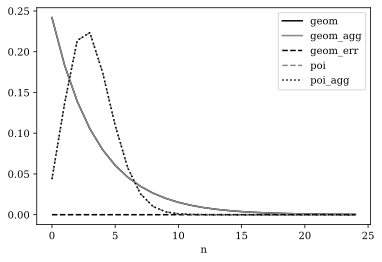

In [39]:
poi = np.zeros(25)
poi[0] = np.exp(-3.134234)
for i in range(1, 25):
    poi[i] = poi[i-1] * 3.134234 / i

geom = np.zeros(25)
p = 1 / 4.134234
geom[0] = p 
for i in range(1, 25):
    geom[i] = geom[i-1] * (1 - p)

df = pd.DataFrame({'n':np.arange(25), 'poi': poi, 'poi_agg': ag_p.density_df.p.iloc[:25],
                  'geom': geom, 'geom_agg': ag_geom.density_df.p.iloc[:25]})
df['poi_err'] = df.poi-df.poi_agg
df['geom_err'] = df.geom - df.geom_agg
df = df.sort_index(1)
df = df.set_index('n')
df.iloc[: , :-1].plot()

In [40]:
df

,geom,geom_agg,geom_err,poi,poi_agg,poi_err
n,,,,,,
0,0.241883,0.241883,-2.775558e-17,4.353309e-02,4.353309e-02,-6.938894e-18
1,0.183375,0.183375,0.000000e+00,1.364429e-01,1.364429e-01,0.000000e+00
2,0.139020,0.139020,0.000000e+00,2.138220e-01,2.138220e-01,-2.775558e-17
3,0.105394,0.105394,1.387779e-17,2.233894e-01,2.233894e-01,-2.775558e-17
4,0.079901,0.079901,0.000000e+00,1.750386e-01,1.750386e-01,-2.775558e-17
5,0.060574,0.060574,6.938894e-18,1.097224e-01,1.097224e-01,-2.775558e-17
6,0.045922,0.045922,6.938894e-18,5.731595e-02,5.731595e-02,6.938894e-18
7,0.034814,0.034814,6.938894e-18,2.566308e-02,2.566308e-02,3.469447e-18
8,0.026393,0.026393,0.000000e+00,1.005426e-02,1.005426e-02,8.673617e-18


# Individual Aggregate Examples 

In [ ]:
test_programs = dict(
            B=('agg B 10 claims sev dhistogram xps [1], [1] binomial 0.2', 10, 1),
            H=('agg H 10 claims sev dhistogram xps [1], [1] poisson', 10, 1),
            I=('agg I 10 claims sev dhistogram xps [1], [1] mixed gamma 0.4', 10, 1),
            J=('agg J 10 claims sev dhistogram xps [1], [1] mixed gamma 1.4', 10, 1),
            K=('agg K 10 claims sev dhistogram xps [1], [1] mixed delaporte 0.4 0.5', 10, 1),
            L=('agg L 10 claims sev dhistogram xps [1], [1] mixed ig 1.4', 10, 1),
            M=('agg M 10 claims sev dhistogram xps [1], [1] mixed sig 0.4 0.5', 10, 1),
            N=('agg N 10 claims sev dhistogram xps [1], [1] mixed pascal 0.4 0.5', 10, 1),
            A=('agg A 2 claims sev 5 * uniform fixed', 10, 0.01),
            E=('agg E 0.2 claims sev 5 * uniform bernoulli',16, 0.01),
            F=('agg F 10 claims 10 xs 5 sev lognorm 10 cv 2 mixed gamma 0.16',16, 0.01),
            G=('agg G 10 claims 10 xs 5 sev lognorm 10 cv 2 mixed gamma 1.4', 17, 0.025),
            P=('agg P 10 claims sev lognorm 10 cv 0.765 mixed sig 0.4 0.5',16, 0.025),
            a=('agg a 1 claim sev dhistogram xps [1 2 3 4] [.25 .25 .25 .25] fixed', 16, 0.025),
            b=('agg b 10 claims sev 5 * uniform binomial 0.2', 16, 0.025),
            c=('agg c 10 claims sev 5 * uniform binomial 0.2', 16, 0.025),
            d=('agg d 10 claims 10 xs 5 sev lognorm 10 cv 2 poisson', 16, 0.025),
            e=('agg e 10 claims 10 xs 5 sev lognorm 10 cv 2 mixed gamma 0.16', 16, 0.025),
            f=('agg f 10 claims 10 xs 5 sev lognorm 10 cv 2 mixed gamma 1.4', 16, 0.05),
            g=('agg g 10 claims sev lognorm 10 cv 0.765 mixed sig 0.4 0.5', 16, 0.025))


In [ ]:
def sc_runner(program, log2, bs):
    ag = uw(program)
    ag.update(np.arange(1 << log2, dtype=float) * bs)
    # checks
    m, em, cv, ecv = ag.audit_df.loc['mixed', 'agg_m'], ag.audit_df.loc['mixed', 'emp_agg_1'], \
                     ag.audit_df.loc['mixed', 'agg_cv'], ag.audit_df.loc['mixed', 'emp_agg_cv']
    merr, cverr = abs(em / m - 1), abs(ecv / cv - 1)
    if merr < 1e-5 and cverr < 1e-5:
        print(f'OK {program[0:50]:<50s}')
    else:
        print(f'mean err = {merr:.4e}, cverr = {cverr:.4e}, {program[0:50]:<50s}')

In [ ]:
for k, v in test_programs.items():
    sc_runner(*v)

# Big Portfolio Example

In [ ]:
port = uw('''port BigTest
    agg Poisson     50 claims sev dhistogram xps [1], [1] poisson
    agg NegBin     50 claims sev dhistogram xps [1], [1] mixed gamma 0.4
    agg Delaporte   50 claims sev dhistogram xps [1], [1] mixed delaporte 0.4 0.6
    agg InvGauss   50 claims sev dhistogram xps [1], [1] mixed ig 0.4
    agg ShiftIG    50 claims sev dhistogram xps [1], [1] mixed sig 0.4 0.6
    agg PoisPascal 50 claims sev dhistogram xps [1], [1] mixed pascal 0.4 1.5''')

In [ ]:
port.recommend_bucket()

In [ ]:
uw['BigTest']

In [ ]:
port.update(10, 1, trim_df=False)

In [ ]:
port

In [ ]:
port.plot(aspect=1.3, subplots=True)

# Sichel Tests

In [ ]:
uw.update = False
port = uw('''port Sichel
    agg Sichlamm2     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5 -2
    agg Sichlamm1     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5 -1
    agg Sichlamm05     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5, -0.5
    agg Sichlam0     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5, 0
    agg Sichlamp05     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5, 0.5
    agg Sichlamp1     50 claims sev dhistogram xps [1], [1]  mixed sichel 0.5, 1
    agg Sichgamma    50 claims sev dhistogram xps [1], [1]  mixed sichel.gamma 0.5, 0.25
    agg Sichig       50 claims sev dhistogram xps [1], [1]  mixed sichel.ig 0.5, 0.25
    agg delap           50 claims sev dhistogram xps [1], [1]  mixed delaporte 0.5 0.25''')

In [ ]:
port

In [ ]:
port.recommend_bucket()

In [ ]:
port.update(10, 1, add_exa=True)

In [ ]:
port

In [ ]:
port.plot(figsize=(8,6), logy=True)

# Beta Tests

In [ ]:
port = uw('''port BetaTest
    agg beta1   20 claims sev dhistogram xps [1], [1]  mixed beta 0.25 30
    agg beta2   20 claims sev dhistogram xps [1], [1]  mixed beta 0.25 40
    agg beta3   20 claims sev dhistogram xps [1], [1]  mixed beta 0.5  30
    agg beta4   20 claims sev dhistogram xps [1], [1]  mixed beta 0.5  40
''')

In [ ]:
port

In [ ]:
port.update(8, 1, verbose=False)

In [ ]:
port.plot(aspect=1.414, subplots=True)

In [ ]:
port

# Broadcasting severities

In [ ]:
uw = trash.Underwriter()

In [ ]:
warnings.simplefilter('error',  RuntimeWarning)
warnings.simplefilter('default',  RuntimeWarning)


## Method 1: Cross product of limit profile and mixing distribution

In [ ]:
ag = uw('agg multiExp [10 20 30] claims [100 200 75] xs [0 50 75] sev lognorm 100 cv [1 2] wts [.6 .4] mixed gamma 0.4')
# ag = uw(f'agg multiExp 10 claims {np.linspace(50, 250, 10)} xs 0  sev lognorm 100 cv {np.linspace(0.75, 2.5, 10)} wts =10 mixed gamma 0.4')
a = ag.update(np.arange(1<<14, dtype=float), verbose=True)
display(a)
ag

In [ ]:
pd.concat((ag.statistics_df, ag.statistics_total_df))

In [ ]:
ag

## Method 2: Seperate severity for each limit component, no cross product

In [ ]:
ag = uw('agg sharedMix [10 30] claims sev lognorm 100 cv [1 2] mixed gamma 0.4')
# ag = uw(f'agg multiExp 10 claims {np.linspace(50, 250, 10)} xs 0  sev lognorm 100 cv {np.linspace(0.75, 2.5, 10)} wts =10 mixed gamma 0.4')
a = ag.update(np.arange(1<<14, dtype=float), verbose=True)
display(a)
ag

# Understanding $K_\gamma$

In [ ]:
import aggregate.utils as tr

In [ ]:
reload(tr)

In [ ]:
df, ans = tr.frequency_examples(n=100, ν=0.45, f=0.5, κ=1.25, sichel_case='', log2=16, xmax=2500) 

In [ ]:
from scipy.special import kv
xs = np.linspace(0, 5, 101)
ls = np.linspace(-5,7,4)
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
for l in ls:
    plt.plot(xs, kv(l, xs), label=f'l={l:.1f}')
plt.legend()
plt.yscale('log')    
plt.subplot(1, 3, 2)
xs = np.linspace(-1.5, 3.5, 7) 
ls = np.linspace(-3, 4, 21)
for x in xs:
    plt.plot(ls, kv(ls, x), label=f'x={x:.1f}')
plt.legend()
plt.yscale('log')
plt.subplot(1, 3, 3)
ls = np.linspace(-3, 4, 2)
xs = np.linspace(0, 5, 101)
for l in ls:
    plt.plot(xs, kv(l+1, xs) / kv(l, xs), label=f'l={l:.1f}')
plt.legend()


# CV of different distributions

In [ ]:
import scipy.stats as ss

In [ ]:
def cv(fz):
    m, v = fz.stats()
    sd = np.sqrt(v)
    return sd / m

In [ ]:
ν = 2.5

In [ ]:
fz = ss.gamma(1/ν**2)

In [ ]:
fz = ss.lognorm(np.sqrt(np.log(ν**2 + 1)))

In [ ]:
fz = ss.invgamma(1 / ν**2 + 2)

In [ ]:
fz = ss.invgauss(ν**2)

In [ ]:
fz = ss.pareto(2 * ν**2 / (ν**2  - 1), loc=-1)

In [ ]:
cv(fz)

In [ ]:
fz.stats()